# CAISO Data Fetcher
This notebook will us the pycaiso python library to collect forecasted caiso data

In [1]:
import os
if 'data' == os.getcwd().split('/')[-1]: os.chdir('..')
if 'ev_charging' == os.getcwd().split('/')[-1]: print('in the right place!')
else: os.chdir('/Users/varunvenkatesh/Documents/Github/ev_charging')
os.getcwd()

in the right place!


'/home/denny/Documents/mids/ev_charging'

In [3]:
from datetime import datetime
import pandas as pd

# use Elizabeth's version
# from oasis import *
from src import oasis

dir(oasis)

['Any',
 'Atlas',
 'BadDateRangeError',
 'Dict',
 'List',
 'NoDataAvailableError',
 'Node',
 'Oasis',
 'Optional',
 'Response',
 'SystemDemand',
 'TypeVar',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'datetime',
 'get_lmps',
 'io',
 'pd',
 'pytz',
 're',
 'relativedelta',
 'requests',
 'timedelta',
 'zipfile']

In [4]:
# example from documentation
# from pycaiso.oasis import Node
from src.oasis import Node
from datetime import datetime
import pandas as pd

# select pnode

cj = Node("CAPTJACK_5_N003")

# create dataframe with LMPS from arbitrary period (30 day maximum). 

cj_lmps = cj.get_lmps(datetime(2021, 1, 1), datetime(2021, 1, 2))

print(cj_lmps.head())

       INTERVALSTARTTIME_GMT        INTERVALENDTIME_GMT     OPR_DT  OPR_HR  \
0  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
1  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
2  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
3  2021-01-01T08:00:00-00:00  2021-01-01T09:00:00-00:00 2021-01-01       1   
4  2021-01-01T09:00:00-00:00  2021-01-01T10:00:00-00:00 2021-01-01       2   

   OPR_INTERVAL      NODE_ID_XML          NODE_ID             NODE  \
0             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
1             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
2             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
3             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   
4             0  CAPTJACK_5_N003  CAPTJACK_5_N003  CAPTJACK_5_N003   

  MARKET_RUN_ID LMP_TYPE XML_DATA_ITEM    PNODE_RESMRID GRP_TYPE  POS  \
0           DAM      LMP       LMP_PR

In [5]:
from src.oasis import SystemDemand
sd = SystemDemand()

In [6]:
df = sd.get_demand_forecast(start=datetime(2024, 3, 26), end=datetime(2024, 3, 27))

In [7]:
data_dict = {'INTERVALSTARTTIME_GMT':'the start of the forecast',
             'INTERVALENDTIME_GMT':'the end time of the forecast',
             'LOAD_TYPE':'no idea what this is',
             'OPR_DT':'date of the forecast',
             'OPR_HR':'operating hour',
             'OPR_INTERVAL':'some interval time',
             'MARKET_RUN_ID':'2DA = two day ahead, DAM= day ahead market, 7DA = seven day ahead forecast', 
             'TAC_AREA_NAME':'Transmission access charge. It is the area in california where the forecast occurs. PGE = Bay area, SCE = LA, SDGE = San Diego. From Claude - A transmission access charge (TAC) is a fee charged by transmission owners and operators, such as PG&E (Pacific Gas and Electric Company), to recover the costs associated with operating and maintaining their high-voltage transmission system.', 
             'LABEL':'same as Market Run ID',
             'XML_DATA_ITEM':'System forecast for the MARKET RUN ID, same as Market run id', 
             'POS':'no idea', 
             'MW':'Megawatts?', 
             'EXECUTION_TYPE':'Same as Market Run ID', 
             'GROUP':'subset of TAC? Should be some kind of region code'}
df

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
0,2024-03-26T17:00:00-00:00,2024-03-26T18:00:00-00:00,2,2024-03-26,11,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1397.26,2DA,1
1,2024-03-26T16:00:00-00:00,2024-03-26T17:00:00-00:00,2,2024-03-26,10,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1424.99,2DA,1
2,2024-03-26T19:00:00-00:00,2024-03-26T20:00:00-00:00,2,2024-03-26,13,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1355.18,2DA,1
3,2024-03-26T18:00:00-00:00,2024-03-26T19:00:00-00:00,2,2024-03-26,12,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1373.27,2DA,1
4,2024-03-26T11:00:00-00:00,2024-03-26T12:00:00-00:00,2,2024-03-26,5,0,2DA,AVA,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.8,1101.59,2DA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2024-03-26T23:00:00-00:00,2024-03-27T00:00:00-00:00,1,2024-03-26,17,0,DAM,WALCDSW,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,148.90,DAM,102
2444,2024-03-26T16:00:00-00:00,2024-03-26T17:00:00-00:00,1,2024-03-26,10,0,DAM,WALCDSW,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,166.97,DAM,102
2445,2024-03-26T22:00:00-00:00,2024-03-26T23:00:00-00:00,1,2024-03-26,16,0,DAM,WALCDSW,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,145.63,DAM,102
2446,2024-03-27T03:00:00-00:00,2024-03-27T04:00:00-00:00,1,2024-03-26,21,0,DAM,WALCDSW,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.8,171.50,DAM,102


<Axes: xlabel='TAC_AREA_NAME'>

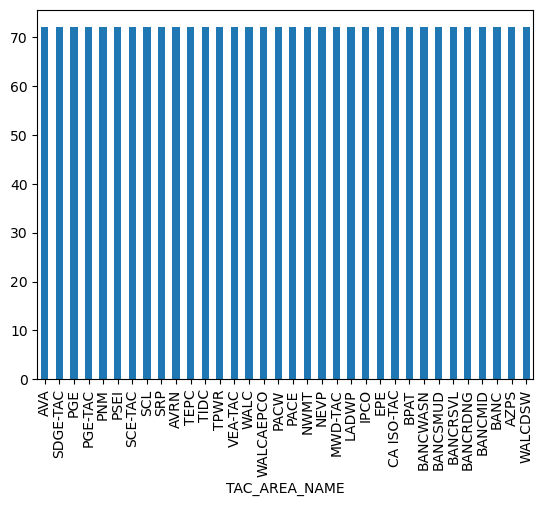

In [9]:
df['TAC_AREA_NAME'].value_counts().plot.bar()

In [10]:
siteid2tac = {2:'SCE-TAC', #caltech
              1:'SCE-TAC', #jpl
              19:'PGE-TAC', #office001
             }

In [12]:
df[df.TAC_AREA_NAME.isin(siteid2tac.values())]

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,LOAD_TYPE,OPR_DT,OPR_HR,OPR_INTERVAL,MARKET_RUN_ID,TAC_AREA_NAME,LABEL,XML_DATA_ITEM,POS,MW,EXECUTION_TYPE,GROUP
480,2024-03-26T09:00:00-00:00,2024-03-26T10:00:00-00:00,2,2024-03-26,3,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,8741.08,2DA,21
481,2024-03-27T06:00:00-00:00,2024-03-27T07:00:00-00:00,2,2024-03-26,24,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,9677.26,2DA,21
482,2024-03-27T05:00:00-00:00,2024-03-27T06:00:00-00:00,2,2024-03-26,23,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,10290.16,2DA,21
483,2024-03-26T11:00:00-00:00,2024-03-26T12:00:00-00:00,2,2024-03-26,5,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,8952.27,2DA,21
484,2024-03-26T07:00:00-00:00,2024-03-26T08:00:00-00:00,2,2024-03-26,1,0,2DA,PGE-TAC,Demand Forecast 2-Day Ahead,SYS_FCST_2DA_MW,1.1,9237.96,2DA,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2024-03-26T15:00:00-00:00,2024-03-26T16:00:00-00:00,1,2024-03-26,9,0,DAM,SCE-TAC,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.2,10457.61,DAM,92
2204,2024-03-26T17:00:00-00:00,2024-03-26T18:00:00-00:00,1,2024-03-26,11,0,DAM,SCE-TAC,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.2,9289.19,DAM,92
2205,2024-03-26T20:00:00-00:00,2024-03-26T21:00:00-00:00,1,2024-03-26,14,0,DAM,SCE-TAC,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.2,8278.00,DAM,92
2206,2024-03-27T00:00:00-00:00,2024-03-27T01:00:00-00:00,1,2024-03-26,18,0,DAM,SCE-TAC,Demand Forecast Day Ahead,SYS_FCST_DA_MW,2.2,9583.13,DAM,92


In [16]:
cols = ['OPR_DT', 'OPR_HR','TAC_AREA_NAME', 'MW']
df.loc[(df['MARKET_RUN_ID'] == '7DA') & (df['TAC_AREA_NAME'] == 'AVA') , cols].sort_values(by=['OPR_DT', 'OPR_HR'])

,OPR_DT,OPR_HR,TAC_AREA_NAME,MW
833,2024-03-23,1,AVA,1004.53
836,2024-03-23,2,AVA,984.95
830,2024-03-23,3,AVA,978.39
834,2024-03-23,4,AVA,984.54
835,2024-03-23,5,AVA,1008.80
819,2024-03-23,6,AVA,1061.97
825,2024-03-23,7,AVA,1142.90
837,2024-03-23,8,AVA,1219.26
826,2024-03-23,9,AVA,1265.92
821,2024-03-23,10,AVA,1275.16


In [14]:
# SystemDemand().get_wind_and_solar_forecast()
df = sd.get_wind_and_solar_forecast(start=datetime(2024, 3, 26), end=datetime(2024, 3, 27))
df.columns

<Response [200]>


Index(['OPR_DT', 'OPR_HR', 'OPR_INTERVAL', 'INTERVALSTARTTIME_GMT',
       'INTERVALENDTIME_GMT', 'TRADING_HUB', 'RENEWABLE_TYPE', 'LABEL',
       'XML_DATA_ITEM', 'MARKET_RUN_ID_POS', 'RENEW_POS', 'MW',
       'MARKET_RUN_ID', 'GROUP'],
      dtype='object')

In [15]:
df.head()

,OPR_DT,OPR_HR,OPR_INTERVAL,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,TRADING_HUB,RENEWABLE_TYPE,LABEL,XML_DATA_ITEM,MARKET_RUN_ID_POS,RENEW_POS,MW,MARKET_RUN_ID,GROUP
0,2024-03-26,1,0,2024-03-26T07:00:00-00:00,2024-03-26T08:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
1,2024-03-26,2,0,2024-03-26T08:00:00-00:00,2024-03-26T09:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
2,2024-03-26,3,0,2024-03-26T09:00:00-00:00,2024-03-26T10:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
3,2024-03-26,4,0,2024-03-26T10:00:00-00:00,2024-03-26T11:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1
4,2024-03-26,5,0,2024-03-26T11:00:00-00:00,2024-03-26T12:00:00-00:00,NP15,Solar,Renewable Forecast Day Ahead,RENEW_FCST_DA_MW,1,2,0.0,DAM,1


# params used by pycaiso library
not needed, unless they are neeeded, ya know?

In [ ]:
params: Dict[str, Any] = {
        "queryname": QUERY_MAPPING[market],
        "market_run_id": market,
        "startdatetime": oasis._get_UTC_string(start),
        "enddatetime": oasis._get_UTC_string(end),
        "version": 1,
        "node": node,
        "resultformat": 6,
    }

# testing crap down below

In [16]:
import datetime as dt
import urllib
d1 = dt.date(2024,3,20)
d2 = dt.date(2024,3,21) # dt.date.today()
days = [d1 + dt.timedelta(days=x) for x in range((d2-d1).days + 1)]
# specify url based on file types available
file_types = ['demand', 'netdemand', 'fuelsource', 'storage', 'co2', 'rtm_forecast']
url_format = "http://www.caiso.com/outlook/SP/History/%s/%s.csv"

In [17]:
day = days[0]
file_type = 'demand'
url = url_format % (day.strftime("%Y%m%d"), file_type)
file = urllib.request.urlopen(url)
file

In [18]:
pd.read_csv(file)

,Time,Day ahead forecast,Hour ahead forecast,Current demand,Demand response
0,00:00,21866,20755,20680,NaN
1,00:05,20945,20755,20803,NaN
2,00:10,20945,20755,20864,NaN
3,00:15,20945,20755,20764,NaN
4,00:20,20945,20679,20722,NaN
...,...,...,...,...,...
284,23:40,21859,21301,21323,NaN
285,23:45,21859,21301,21223,NaN
286,23:50,21859,21089,21095,NaN
287,23:55,21859,21089,21006,NaN


In [ ]:
"http://oasis.caiso.com/mrtu-oasis/SingleZip?queryname=AS_REQ&startdate=20061002&enddate=20061002&market_run_id=DAM&as_type=ALL&as_region=ALL"

In [20]:
url_format = "http://oasis.caiso.com/mrtu-oasis/SingleZip?queryname=SLD_FCST&market_run_id=DAM&startdate=%s&enddate=%s"
url = url_format % (d1.strftime("%Y%m%d"), d2.strftime("%Y%m%d"))
print(url)
file = urllib.request.urlopen(url)
file

http://oasis.caiso.com/mrtu-oasis/SingleZip?queryname=SLD_FCST&market_run_id=DAM&startdate=20240320&enddate=20240321


HTTPError: HTTP Error 404: Not Found

In [ ]:
http://oasis.caiso.com/oasisapi/SingleZip?

In [8]:
url = "http://oasismap.caiso.com/oasisapi/SingleZip?queryname=AS_REQ&startdatetime=20240919T07:00-0000&enddatetime=20240920T07:00-0000&market_run_id=DAM&version=1&as_type=ALL&as_region=ALL"
file = urllib.request.urlopen(url)
file

NameError: name 'urllib' is not defined

In [33]:
dir(file)
file.peek()

b''

In [16]:
!pip install pyiso

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 6.3 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.0/422.0 kB 9.1 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.0/200.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
  Created wheel for pyiso: filename=pyiso-0.4.0-py3-none-any.whl size=84613 sha256=818c88c5df961ca5ff874ba1b8a98df4909d5d05972301faab9c4e4916727f84
  Stored in directory: /home/de

In [17]:
from pyiso import CAISO

ModuleNotFoundError: No module named 'pyiso'